## Information:
This script was used to tune the parameter of n_estimators for Random Forest Regressor.

Just run all the cells and you will get the same results and time needed as we did.

## Importing the libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import catboost as cb
from sklearn.ensemble import RandomForestRegressor
import time

## Experiment 1: With value of n_estimators = 10

In [39]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [40]:
#Creating Dummies for train Data
dfen = pd.get_dummies(train_df["EntryHeading"],prefix = 'en')
dfex = pd.get_dummies(train_df["ExitHeading"],prefix = 'ex')
train_df = pd.concat([train_df,dfen],axis=1)
train_df = pd.concat([train_df,dfex],axis=1)

#Creating Dummies for test Data
dfent = pd.get_dummies(test_df["EntryHeading"],prefix = 'en')
dfext = pd.get_dummies(test_df["ExitHeading"],prefix = 'ex')
test_df = pd.concat([test_df,dfent],axis=1)
test_df = pd.concat([test_df,dfext],axis=1)

In [41]:
X = train_df[["IntersectionId","Hour","Weekend","Month",'en_E',
       'en_N', 'en_NE', 'en_NW', 'en_S', 'en_SE', 'en_SW', 'en_W', 'ex_E',
       'ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]
y1 = train_df["TotalTimeStopped_p20"]
y2 = train_df["TotalTimeStopped_p50"]
y3 = train_df["TotalTimeStopped_p80"]
y4 = train_df["DistanceToFirstStop_p20"]
y5 = train_df["DistanceToFirstStop_p50"]
y6 = train_df["DistanceToFirstStop_p80"]

testX = test_df[["IntersectionId","Hour","Weekend","Month",'en_E','en_N', 'en_NE', 'en_NW', 'en_S', 
              'en_SE', 'en_SW', 'en_W', 'ex_E','ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]

In [42]:
start = time.time()

In [43]:
RMSE_b2 = []
def randomforest(X,Y):
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.3, random_state = 23)
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 23)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_validate)
    return sqrt(mean_squared_error(y_validate, y_pred))

In [44]:
outcome = [y1,y2,y3,y4,y5,y6]
for i in range(len(outcome)):
    RMSE = randomforest(X,outcome[i])
    RMSE_b2.append(RMSE)  

In [45]:
end = time.time()

In [46]:
print(f"Runtime of the program is {end - start}")

Runtime of the program is 110.97777676582336


[6.637570273929474, 12.257819557375088, 21.248678159348813, 29.188448062603182, 63.65486193578891, 113.93812529997912]

Mean RMSE:  41.15425054817076


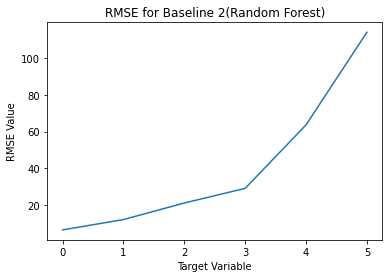

In [47]:
print(RMSE_b2)
print("\nMean RMSE: ", np.mean(RMSE_b2))
plt.plot(RMSE_b2)
plt.title('RMSE for Baseline 2(Random Forest)')
plt.xlabel('Target Variable')
plt.ylabel('RMSE Value')
plt.show()

## Experiment 2: With value of n_estimators = 50

In [48]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [49]:
#Creating Dummies for train Data
dfen = pd.get_dummies(train_df["EntryHeading"],prefix = 'en')
dfex = pd.get_dummies(train_df["ExitHeading"],prefix = 'ex')
train_df = pd.concat([train_df,dfen],axis=1)
train_df = pd.concat([train_df,dfex],axis=1)

#Creating Dummies for test Data
dfent = pd.get_dummies(test_df["EntryHeading"],prefix = 'en')
dfext = pd.get_dummies(test_df["ExitHeading"],prefix = 'ex')
test_df = pd.concat([test_df,dfent],axis=1)
test_df = pd.concat([test_df,dfext],axis=1)

In [50]:
X = train_df[["IntersectionId","Hour","Weekend","Month",'en_E',
       'en_N', 'en_NE', 'en_NW', 'en_S', 'en_SE', 'en_SW', 'en_W', 'ex_E',
       'ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]
y1 = train_df["TotalTimeStopped_p20"]
y2 = train_df["TotalTimeStopped_p50"]
y3 = train_df["TotalTimeStopped_p80"]
y4 = train_df["DistanceToFirstStop_p20"]
y5 = train_df["DistanceToFirstStop_p50"]
y6 = train_df["DistanceToFirstStop_p80"]

testX = test_df[["IntersectionId","Hour","Weekend","Month",'en_E','en_N', 'en_NE', 'en_NW', 'en_S', 
              'en_SE', 'en_SW', 'en_W', 'ex_E','ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]

In [51]:
start = time.time()

In [52]:
RMSE_b2 = []
def randomforest(X,Y):
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.3, random_state = 23)
    regressor = RandomForestRegressor(n_estimators = 50,random_state = 23)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_validate)
    return sqrt(mean_squared_error(y_validate, y_pred))

In [53]:
outcome = [y1,y2,y3,y4,y5,y6]
for i in range(len(outcome)):
    RMSE = randomforest(X,outcome[i])
    RMSE_b2.append(RMSE)  

In [54]:
end = time.time()

In [55]:
print(f"Runtime of the program is {end - start}")

Runtime of the program is 553.9090628623962


[6.427704758202294, 11.858943943670825, 20.495608790598382, 28.405763446555603, 61.97514690397094, 110.59561943366377]

Mean RMSE:  39.959797879443634


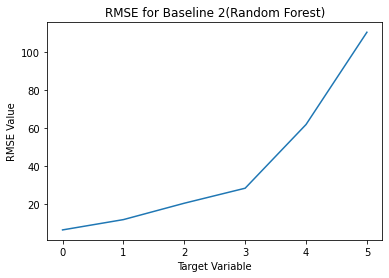

In [56]:
print(RMSE_b2)
print("\nMean RMSE: ", np.mean(RMSE_b2))
plt.plot(RMSE_b2)
plt.title('RMSE for Baseline 2(Random Forest)')
plt.xlabel('Target Variable')
plt.ylabel('RMSE Value')
plt.show()

## Experiment 3: With value of n_estimators = 100

In [57]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [58]:
#Creating Dummies for train Data
dfen = pd.get_dummies(train_df["EntryHeading"],prefix = 'en')
dfex = pd.get_dummies(train_df["ExitHeading"],prefix = 'ex')
train_df = pd.concat([train_df,dfen],axis=1)
train_df = pd.concat([train_df,dfex],axis=1)

#Creating Dummies for test Data
dfent = pd.get_dummies(test_df["EntryHeading"],prefix = 'en')
dfext = pd.get_dummies(test_df["ExitHeading"],prefix = 'ex')
test_df = pd.concat([test_df,dfent],axis=1)
test_df = pd.concat([test_df,dfext],axis=1)

In [59]:
X = train_df[["IntersectionId","Hour","Weekend","Month",'en_E',
       'en_N', 'en_NE', 'en_NW', 'en_S', 'en_SE', 'en_SW', 'en_W', 'ex_E',
       'ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]
y1 = train_df["TotalTimeStopped_p20"]
y2 = train_df["TotalTimeStopped_p50"]
y3 = train_df["TotalTimeStopped_p80"]
y4 = train_df["DistanceToFirstStop_p20"]
y5 = train_df["DistanceToFirstStop_p50"]
y6 = train_df["DistanceToFirstStop_p80"]

testX = test_df[["IntersectionId","Hour","Weekend","Month",'en_E','en_N', 'en_NE', 'en_NW', 'en_S', 
              'en_SE', 'en_SW', 'en_W', 'ex_E','ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]

In [60]:
start = time.time()

In [61]:
RMSE_b2 = []
def randomforest(X,Y):
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.3, random_state = 23)
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 23)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_validate)
    return sqrt(mean_squared_error(y_validate, y_pred))

In [62]:
outcome = [y1,y2,y3,y4,y5,y6]
for i in range(len(outcome)):
    RMSE = randomforest(X,outcome[i])
    RMSE_b2.append(RMSE)  

In [63]:
end = time.time()

In [64]:
print(f"Runtime of the program is {end - start}")

Runtime of the program is 1126.4324600696564


[6.414427114086553, 11.813477301367145, 20.428190307128894, 28.271881290079516, 61.7127824274199, 110.15213802139468]

Mean RMSE:  39.79881607691278


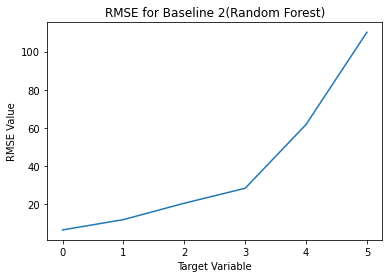

In [65]:
print(RMSE_b2)
print("\nMean RMSE: ", np.mean(RMSE_b2))
plt.plot(RMSE_b2)
plt.title('RMSE for Baseline 2(Random Forest)')
plt.xlabel('Target Variable')
plt.ylabel('RMSE Value')
plt.show()

## Thus, from this we can conclude that the value of n_estimators = 50 is the best amongest the three values because it has better performance than the value of 10 and takes half time as compared to value of 100.